# Определение наилучшего тарифа для телеком-компании

# Описание задачи

У телеком-компании имеются два тарифных плана: «Смарт» и «Ультра». Имеется выборка клиентов с информацией о том кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений отправили за 2018 год. Необходимо выполнить анализ тарифов на выборке клиентов и определить, какой тариф приносит больше денег. Также нужно проверить отличается ли средняя выручка по Москве от выручки по другим регионам.

# План работы

1. Обзор данных
    1. Чтение файлов с данными
    2. Оценка содержимого и размера прочитанных таблиц
    3. Поиск пропусков данных в таблицах
    4. Поиск строк-дубликатов в таблицах
    5. Вывод
2. Подготовка данных
    1. Приведение данных к нужному виду
    2. Поиск и исправление ошибок в данных
    3. Подсчёт данных для каждого пользователя
    4. Вывод
3. Анализ данных
    1. Вывод
4. Проверка гипотез
    1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
    2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
    3. Вывод
5. Общий вывод

# Описание тарифов

Тариф «Смарт»

   1. Ежемесячная плата: 550 рублей
    
   2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    
   3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.
   
Тариф «Ультра»

   1. Ежемесячная плата: 1950 рублей
   
   2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
   
   3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.
   
Примечание:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
    
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

# Описание данных

Таблица `users` (информация о пользователях):

* user_id — уникальный идентификатор пользователя*  first_name — имя пользовтеля
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом  (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного планао плана

Таблица `calls` (информация о звонках):

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):

* id — уникальный номер сессии
* mb_used —  объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица `tariffs` (информация о тарифах):

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Обзор данных

### Чтение файлов с данными

Импортируем необходимые библиотеки и прочитаем таблицы

In [123]:
import pandas as pd
from math import ceil

In [124]:
data_calls = pd.read_csv('/datasets/calls.csv')

In [125]:
data_internet = pd.read_csv('/datasets/internet.csv')

In [126]:
data_messages = pd.read_csv('/datasets/messages.csv')

In [127]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')

In [128]:
data_users = pd.read_csv('/datasets/users.csv')

### Оценка содержимого и размера прочитанных таблиц

Далее выполним оценку содержимого и размера прочитанных таблиц

In [129]:
data_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [130]:
data_internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [131]:
data_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [132]:
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [133]:
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


### Поиск пропусков данных в таблицах

Далее выполним поиск пропусков в каждой таблице, кроме data_tariffs, у которой 2 строки

In [134]:
data_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [135]:
data_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [136]:
data_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [137]:
data_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

В таблице data_users присутствуют 462 пропуска в столбце "дата прекращения пользования тарифом". В примечании к этим данным сказано, что "если значение пропущено, то тариф ещё действовал на момент выгрузки данных". Вывод: пропусков, которые нужно заполнять, нет.

### Поиск строк-дубликатов в таблицах

Далее выполним поиск строк-дубликатов в каждой таблице, кроме data_tariffs, у которой 2 строки

In [138]:
data_calls.duplicated().sum()

0

In [139]:
data_internet.duplicated().sum()

0

In [140]:
data_messages.duplicated().sum()

0

In [141]:
data_users.duplicated().sum()

0

Вывод: строки-дубликаты во всех таблицах отсутствуют

### Вывод

Во всех таблицах отсутствуют пропуски, которые необходимо заполнить. Строки-дубликаты также отсутствуют.

## Подготовка данных

### Приведение данных к нужному виду

In [142]:
#Вывод сводной информации о таблице
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Требуется привести данные к нужным типам в следующих столбцах:

id - необходимо привести данные к типу int64

call_date - необходимо привести данные к типу datetime64

duration - необходимо привести данные к типу int64

Выполним округление значений столбца duration в большую сторону.

In [143]:
#Округление значений столбца duration в бОльшую сторону
data_calls['duration'] = data_calls['duration'].apply(ceil)

In [144]:
#Приведение данных к нужным типам и проверка результата
data_calls['id'] = data_calls['id'].astype('int64')
data_calls['call_date'] = data_calls['call_date'].astype('datetime64')
data_calls['duration'] = data_calls['duration'].astype('int64')
data_calls.dtypes

id                    int64
call_date    datetime64[ns]
duration              int64
user_id               int64
dtype: object

In [145]:
#Вывод сводной информации о таблице
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Требуется привести данные к нужным типам в следующих столбцах:

id - необходимо привести данные к типу int64

mb_used - необходимо привести данные к типу int64

session_date - необходимо привести данные к типу datetime64

Выполним округление значений столбца mb_used в большую сторону.

In [146]:
#Округление значений столбца mb_used в бОльшую сторону
data_internet['mb_used'] = data_internet['mb_used'].apply(ceil)

In [147]:
#Приведение данных к нужным типам
data_internet['id'] = data_internet['id'].astype('int64')
data_internet['mb_used'] = data_internet['mb_used'].astype('int64')
data_internet['session_date'] = data_internet['session_date'].astype('datetime64')
data_internet.dtypes

Unnamed: 0               int64
id                       int64
mb_used                  int64
session_date    datetime64[ns]
user_id                  int64
dtype: object

In [148]:
#Вывод сводной информации о таблице
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Требуется привести данные к нужным типам в следующих столбцах:
    
id - необходимо привести данные к типу int64

message_date - необходимо привести данные к типу datetime64

In [149]:
#Приведение данных к нужным типам
data_messages['id'] = data_messages['id'].astype('int64')
data_messages['message_date'] = data_messages['message_date'].astype('datetime64')
data_messages.dtypes

id                       int64
message_date    datetime64[ns]
user_id                  int64
dtype: object

In [150]:
#Вывод сводной информации о таблице
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В данной таблице нет необходимости изменять тип данных.  

In [151]:
#Вывод сводной информации о таблице
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Требуется привести данные к нужным типам в следующих столбцах:

churn_date - необходимо привести данные к типу datetime64

reg_date - необходимо привести данные к типу datetime64

In [152]:
#Приведение данных к нужным типам
data_users['churn_date'] = data_users['churn_date'].astype('datetime64')
data_users['reg_date'] = data_users['reg_date'].astype('datetime64')
data_users.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

### Поиск и исправление ошибок в данных

Проверим данные для трафика на наличие нулевых значений

In [154]:
#Поиск значений 0 в таблице data_internet
data_internet[data_internet[:]==0].count()

Unnamed: 0          1
id                  0
mb_used         19598
session_date        0
user_id             0
dtype: int64

In [155]:
#Размер таблицы data_internet
data_internet.shape

(149396, 5)

Из 149396 записей в таблице, 19598 записей в столбце mb_used содержат значения 0. Одно значение 0 содержится в безымянном столбце Unnamed: 0, значения которого дублируют индексы записей в таблице.

### Подсчет данных для каждого пользователя

In [156]:
#Определение порядкового номера месяца в каждой таблице по столбцу даты и запись его в новый столбец
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month

In [157]:
#количество сделанных звонков по месяцам
data_calls_number = data_calls.groupby(['user_id', 'month'])['duration'].count()
data_calls_number = pd.DataFrame(data_calls_number)
data_calls_number.set_axis(['number_calls_per_month'],axis = 'columns',inplace = True)
data_calls_number

number_calls_per_month
user_id month                        
1000    5                          22
        6                          43
        7                          47
        8                          52
        9                          58
...                               ...
1498    10                         41
1499    9                           9
        10                         68
        11                         74
        12                         69

[3174 rows x 1 columns]

In [158]:
#Количество израсходованных минут разговора по месяцам
data_calls_duration = data_calls.groupby(['user_id', 'month'])['duration'].sum()
data_calls_duration = pd.DataFrame(data_calls_duration)
data_calls_duration.query('user_id==1000')

duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466
        10          350
        11          338
        12          333

In [159]:
#количество отправленных сообщений по месяцам
data_messages_number = data_messages.groupby(['user_id', 'month'])['message_date'].count()
data_messages_number = pd.DataFrame(data_messages_number)
data_messages_number.set_axis(['number_messages_per_month'],axis = 'columns',inplace = True)
data_messages_number

number_messages_per_month
user_id month                           
1000    5                             22
        6                             60
        7                             75
        8                             81
        9                             57
...                                  ...
1498    10                            42
1499    9                             11
        10                            48
        11                            59
        12                            66

[2717 rows x 1 columns]

In [160]:
#объем израсходованного интернет-трафика по месяцам
data_internet_mb_used = data_internet.groupby(['user_id', 'month'])['mb_used'].sum()
data_internet_mb_used = pd.DataFrame(data_internet_mb_used)
data_internet_mb_used

mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
...                ...
1498    10       20604
1499    9         1848
        10       17809
        11       17984
        12       13077

[3203 rows x 1 columns]

In [161]:
#Объединение таблиц data_calls_number и data_calls_duration и сохранение в data_union
data_union = data_calls_number.merge(data_calls_duration, on=['user_id','month'], how='outer')

In [162]:
#Присоединение к таблице data_union таблицы data_messages_number
data_union = data_union.merge(data_messages_number, on=['user_id','month'], how='outer')

In [163]:
#присоединение к таблице data_union таблицы data_internet_mb_used
data_union = data_union.merge(data_internet_mb_used, on=['user_id','month'], how='outer')

In [164]:
#Сохранение из столбца мультииндекса значения порядкового номера месяца в новый обычный столбец. Эти данные в дальнейшем понадобятся.
data_union['month'] = data_union.index.get_level_values('month')

In [165]:
#Переименование столбца с названием тарифа в tariff. Такое же название используется в таблице data_users, к которой будем подключать таблицу data_tariffs по данному столбцу
data_tariffs.set_axis(['messages_included','mb_per_month_included','minutes_included','rub_monthly_fee','rub_per_gb','rub_per_message','rub_per_minute','tariff'],axis = 'columns',inplace = True)
data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [166]:
# Присоединение к таблице data_union таблицы data_users. В этот раз только по столбцу use_id.
# Мультииндекс исчезнет со столбцом month. Здесь нам пригодится обычный столбец month, в котором останутся номера месяцев.
data_union = data_union.merge(data_users, on='user_id', how='outer')

In [167]:
# Присоединение к таблице data_union таблицы data_tariffs
data_union = data_union.merge(data_tariffs, on='tariff', how='outer')

In [168]:
# Результат объединения таблиц
data_union

,user_id,number_calls_per_month,duration,number_messages_per_month,mb_used,month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,22.0,159.0,22.0,2256.0,5.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,43.0,172.0,60.0,23257.0,6.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,47.0,340.0,75.0,14016.0,7.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,52.0,408.0,81.0,14070.0,8.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,58.0,466.0,57.0,14581.0,9.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,NaN,NaN,32.0,17232.0,9.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,NaN,NaN,21.0,19588.0,10.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3213,1489,NaN,NaN,20.0,17516.0,11.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3214,1489,NaN,NaN,35.0,17341.0,12.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


Далее начинается поэтапное вычисление размера выручки. Учитывается тот факт, что разность между затраченными минутами и минутами включенными в тариф может оказаться отрицательной.

In [169]:
#Добавление нового столбца с размером выручки за разговоры
data_union['calls_proceeds'] = (data_union [data_union['duration']>data_union['minutes_included']] ['duration'] - data_union [data_union['duration']>data_union['minutes_included']] ['minutes_included']) * data_union['rub_per_minute']

In [170]:
#Заполнение нулями пропусков означающих, что разность между затраченными минутами и минутами включенными в тариф
# была отрицательной, а значит выручка оказалась нулевой
data_union['calls_proceeds'] = data_union['calls_proceeds'].fillna(0)

In [171]:
#Добавление нового столбца с размером выручки за сообщения
data_union['messages_proceeds'] = (data_union [data_union['number_messages_per_month']>data_union['messages_included']] ['number_messages_per_month'] - data_union [data_union['number_messages_per_month']>data_union['messages_included']]['messages_included']) * data_union['rub_per_message']

In [172]:
#Заполнение нулями пропусков означающих, что разность между затраченными сообщениями и сообщениями включенными в тариф
# была отрицательной, а значит выручка оказалась нулевой
data_union['messages_proceeds'] = data_union['messages_proceeds'].fillna(0)

In [173]:
#Добавление нового столбца с размером выручки за интернет
data_union['mg_proceeds'] = (data_union [data_union['mb_used']>data_union['mb_per_month_included']] ['mb_used'] - data_union [data_union['mb_used']>data_union['mb_per_month_included']] ['mb_per_month_included'])/1024 * data_union['rub_per_gb']

In [174]:
#Заполнение нулями пропусков означающих, что разность между затраченным трафиком и трафиком включенным в тариф
# была отрицательной, а значит выручка оказалась нулевой
data_union['mg_proceeds'] = data_union['mg_proceeds'].fillna(0)

In [175]:
#Подсчет итоговой выручки в столбце proceeds
data_union['proceeds'] = data_union['calls_proceeds'] + \
data_union['messages_proceeds'] + \
data_union['mg_proceeds'] + \
data_union['rub_monthly_fee']

In [176]:
#Результат добавления и заполнения столбцов
data_union

,user_id,number_calls_per_month,duration,number_messages_per_month,mb_used,month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_proceeds,messages_proceeds,mg_proceeds,proceeds
0,1000,22.0,159.0,22.0,2256.0,5.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
1,1000,43.0,172.0,60.0,23257.0,6.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
2,1000,47.0,340.0,75.0,14016.0,7.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
3,1000,52.0,408.0,81.0,14070.0,8.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
4,1000,58.0,466.0,57.0,14581.0,9.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,NaN,NaN,32.0,17232.0,9.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,365.625000,915.625000
3212,1489,NaN,NaN,21.0,19588.0,10.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,825.781250,1375.781250
3213,1489,NaN,NaN,20.0,17516.0,11.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,421.093750,971.093750
3214,1489,NaN,NaN,35.0,17341.0,12.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,386.914062,936.914062


In [179]:
pd.set_option('display.max_columns', None)

In [180]:
data_union

,user_id,number_calls_per_month,duration,number_messages_per_month,mb_used,month,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_proceeds,messages_proceeds,mg_proceeds,proceeds
0,1000,22.0,159.0,22.0,2256.0,5.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
1,1000,43.0,172.0,60.0,23257.0,6.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
2,1000,47.0,340.0,75.0,14016.0,7.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
3,1000,52.0,408.0,81.0,14070.0,8.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
4,1000,58.0,466.0,57.0,14581.0,9.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.0,0.0,0.000000,1950.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,NaN,NaN,32.0,17232.0,9.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,365.625000,915.625000
3212,1489,NaN,NaN,21.0,19588.0,10.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,825.781250,1375.781250
3213,1489,NaN,NaN,20.0,17516.0,11.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,421.093750,971.093750
3214,1489,NaN,NaN,35.0,17341.0,12.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,0.0,0.0,386.914062,936.914062


Там где выручка за разговоры, сообщения и интернет нулевая, там в столбце proceeds присутствует только размер абонентской платы.

### Вывод

Был выявлен и указан ряд столбцов, у которых требуется изменение типа данных. Для этих столбцов было выполнено приведение типа данных к требуемому. 

Ошибки в данных найдены не были.

Для каждого пользователя были посчитаны и указаны требуемые данные.

## Анализ данных

In [181]:
#Суммарное количество минут, сообщений и трафика в мб всех пользователей тарифа smart по месяцам
data_union[data_union['tariff']=='smart'].groupby('month')[['duration', 'number_messages_per_month', 'mb_used']].sum()

,duration,number_messages_per_month,mb_used
month,,,
1.0,6931.0,620.0,289831.0
2.0,17324.0,1397.0,673461.0
3.0,30034.0,2453.0,1164537.0
4.0,41119.0,3443.0,1509702.0
5.0,54618.0,4762.0,2231353.0
6.0,64885.0,5478.0,2593622.0
7.0,82079.0,6784.0,3168466.0
8.0,99045.0,7905.0,3908561.0
9.0,111439.0,8746.0,4244377.0


In [182]:
#Суммарное количество минут, сообщений и трафика в мб всех пользователей тарифа ultra по месяцам
data_union[data_union['tariff']=='ultra'].groupby('month')[['duration', 'number_messages_per_month', 'mb_used']].sum()

,duration,number_messages_per_month,mb_used
month,,,
1.0,3853.0,304.0,118382.0
2.0,7131.0,527.0,282887.0
3.0,18117.0,1195.0,649423.0
4.0,25191.0,1736.0,926409.0
5.0,34192.0,2536.0,1298540.0
6.0,40295.0,3505.0,1591148.0
7.0,49667.0,4536.0,1866833.0
8.0,54653.0,5183.0,2096565.0
9.0,62036.0,6013.0,2210554.0


In [183]:
#Среднее количество минут, сообщений и трафика в мб всех пользователей тарифа smart по месяцам
x=data_union[data_union['tariff']=='smart'].groupby('month')[['duration', 'number_messages_per_month', 'mb_used']].mean()
print(x)

         duration  number_messages_per_month       mb_used
month                                                     
1.0    203.852941                  20.000000   8524.441176
2.0    298.689655                  27.940000  11611.396552
3.0    390.051948                  35.550725  15123.857143
4.0    367.133929                  35.864583  13479.482143
5.0    387.361702                  39.032787  15825.198582
6.0    398.067485                  38.577465  15814.768293
7.0    408.353234                  38.988506  15763.512438
8.0    423.269231                  38.750000  16703.252137
9.0    430.266409                  39.219731  16324.526923
10.0   427.590444                  39.082677  16778.564626
11.0   436.647619                  39.881481  16917.531646
12.0   479.985119                  42.264808  18136.833828


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ddbec6110>,
      dtype=object)

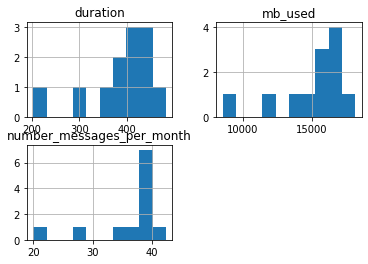

In [184]:
#Построение гистограмм полученных данных
x.hist()

In [185]:
#Среднее количество минут, сообщений и трафика в мб всех пользователей тарифа ultra по месяцам
x=data_union[data_union['tariff']=='ultra'].groupby('month')[['duration', 'number_messages_per_month', 'mb_used']].mean()
print(x)

         duration  number_messages_per_month       mb_used
month                                                     
1.0    428.111111                  43.428571  13153.555556
2.0    297.125000                  32.937500  12858.500000
3.0    489.648649                  47.800000  17551.972973
4.0    475.301887                  44.512821  16843.800000
5.0    534.250000                  48.769231  19674.848485
6.0    497.469136                  52.313433  19170.457831
7.0    564.397727                  62.136986  20742.588889
8.0    530.611650                  58.897727  19778.915094
9.0    558.882883                  63.294737  19390.824561
10.0   581.728814                  69.776699  20228.327869
11.0   562.364341                  66.159292  19954.225564
12.0   614.925373                  72.008547  21971.659420


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ddbef6e50>,
      dtype=object)

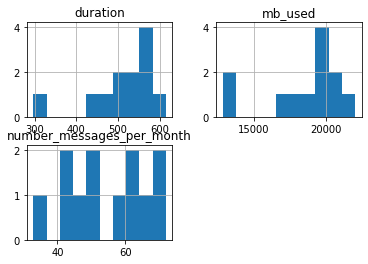

In [186]:
#Построение гистограмм полученных данных
x.hist()


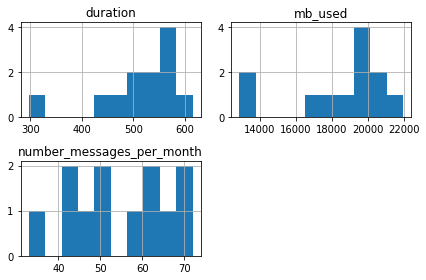

In [188]:
#Построение гистограмм полученных данных
import matplotlib.pyplot as plt
x.hist()
plt.tight_layout()
plt.show()

In [189]:
#Дисперсия количества минут, сообщений и трафика в мб всех пользователей тарифа ultra по месяцам
x=data_union[data_union['tariff']=='ultra'].pivot_table(index='month', values=['duration', 'number_messages_per_month', 'mb_used'], aggfunc='var')
print(x)

            duration       mb_used  number_messages_per_month
month                                                        
1.0     72769.361111  4.722641e+07                 765.285714
2.0     87919.679348  1.098915e+08                 713.395833
3.0    111384.900901  1.201640e+08                1826.666667
4.0     66036.830189  9.462393e+07                1408.256410
5.0     74881.015873  9.680491e+07                1559.553544
6.0     86019.652160  8.314920e+07                1935.672999
7.0     86952.587121  9.783655e+07                2190.730974
8.0     91169.553588  1.073123e+08                2022.966432
9.0     98597.904341  8.764804e+07                1906.763270
10.0    97140.336086  9.371314e+07                2426.606511
11.0    88449.624031  9.609150e+07                2249.295828
12.0   107981.031983  1.051943e+08                2362.870616


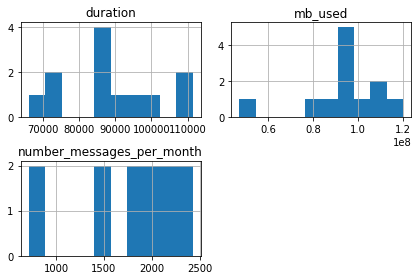

In [191]:
#Построение гистограмм полученных данных
import matplotlib.pyplot as plt
x.hist()
plt.tight_layout()
plt.show()

In [192]:
#Дисперсия количества минут, сообщений и трафика в мб всех пользователей тарифа smart по месяцам
x=data_union[data_union['tariff']=='smart'].pivot_table(index='month', values=['duration', 'number_messages_per_month', 'mb_used'], aggfunc='var')
print(x)

           duration       mb_used  number_messages_per_month
month                                                       
1.0    23787.341355  4.162621e+07                 252.133333
2.0    36412.287961  3.911935e+07                 440.465714
3.0    36823.155161  3.405260e+07                 669.780477
4.0    34778.207127  3.254736e+07                 517.865680
5.0    34820.061094  3.582236e+07                 638.775776
6.0    29960.520109  3.361642e+07                 731.635801
7.0    32250.269602  3.486110e+07                 719.352468
8.0    34177.270551  3.030580e+07                 767.213054
9.0    32950.529526  2.706215e+07                 702.505555
10.0   34889.530319  3.441711e+07                 736.503019
11.0   31100.611101  2.858852e+07                 711.361366
12.0   39131.447539  3.114083e+07                 832.447114


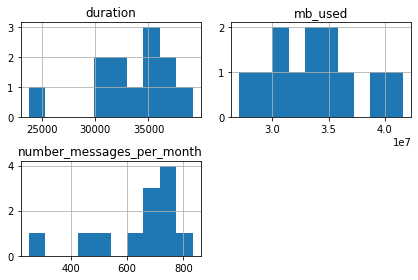

In [193]:
#Построение гистограмм полученных данных
import matplotlib.pyplot as plt
x.hist()
plt.tight_layout()
plt.show()

In [194]:
#Стандартное отклонение количества минут, сообщений и трафика в мб всех пользователей тарифа ultra по месяцам
x=data_union[data_union['tariff']=='ultra'].pivot_table(index='month', values=['duration', 'number_messages_per_month', 'mb_used'], aggfunc='std')
print(x)

         duration       mb_used  number_messages_per_month
month                                                     
1.0    269.757968   6872.147046                  27.663798
2.0    296.512528  10482.912471                  26.709471
3.0    333.743765  10961.936316                  42.739521
4.0    256.976322   9727.483304                  37.526743
5.0    273.643958   9838.948697                  39.491183
6.0    293.291071   9118.618095                  43.996284
7.0    294.877241   9891.235899                  46.805245
8.0    301.942964  10359.164436                  44.977399
9.0    314.003032   9362.053368                  43.666501
10.0   311.673445   9680.554593                  49.260598
11.0   297.404815   9802.627285                  47.426742
12.0   328.604674  10256.429423                  48.609368


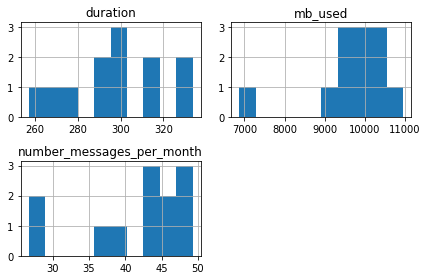

In [195]:
#Построение гистограмм полученных данных
import matplotlib.pyplot as plt
x.hist()
plt.tight_layout()
plt.show()

In [196]:
#Стандартное отклонение количества минут, сообщений и трафика в мб всех пользователей тарифа smart по месяцам
x=data_union[data_union['tariff']=='smart'].pivot_table(index='month', values=['duration', 'number_messages_per_month', 'mb_used'], aggfunc='std')
print(x)

         duration      mb_used  number_messages_per_month
month                                                    
1.0    154.231454  6451.837940                  15.878707
2.0    190.820041  6254.546293                  20.987275
3.0    191.893604  5835.460138                  25.880117
4.0    186.489161  5705.029114                  22.756662
5.0    186.601343  5985.177978                  25.274014
6.0    173.091075  5797.966469                  27.048767
7.0    179.583601  5904.328642                  26.820747
8.0    184.870956  5505.070456                  27.698611
9.0    181.522807  5202.129029                  26.504821
10.0   186.787393  5866.609964                  27.138589
11.0   176.353653  5346.823769                  26.671359
12.0   197.816702  5580.397230                  28.852160


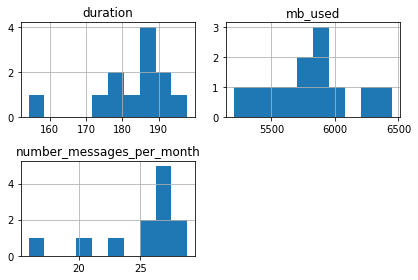

In [197]:
#Построение гистограмм полученных данных
import matplotlib.pyplot as plt
x.hist()
plt.tight_layout()
plt.show()

### Вывод

Было посчитано среднее количество, дисперсия и стандартное отклонение минут разговоров, количества сообщений и трафика интернета для пользователей кадого тарифа в месяц. По результатам построены гистограммы.

## Проверка гипотез

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Здесь проверяется гипотеза о равенстве средних двух совокупностей. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяют метод scipy.stats.ttest_ind (array1, array2, equal_var)

In [198]:
#Импорт библиотеки scipy для применения метода st.ttest_ind
from scipy import stats as st

In [199]:
#Задание порогового значения alpha
alpha=0.05

In [200]:
#Применение метода st.ttest_ind к двум совокупностям
results=st.ttest_ind(data_union[data_union['tariff']=='smart']['proceeds'], data_union[data_union['tariff']=='ultra']['proceeds'])

In [201]:
#Вывод полученного p-value
print('p-значение:', results.pvalue)

p-значение: 6.129437607155033e-191


Далее следует результат проверки гипотезы. Нулевая гипотеза утверждает, что среднии двух совокупностей равны. Альтернативная гипотеза утверждает, что средние двух совокупностей неравны.

In [202]:
#Результат проверки гипотезы
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Результат: средние двух совокупностей неравны.

Этот результат и саму гипотезу можно проверить также следующим образом:

In [203]:
#Вычисление среднего первой совокупности
data_union[data_union['tariff']=='smart']['proceeds'].mean()

1233.0430318105382

In [204]:
#Вычисление среднего второй совокупности
data_union[data_union['tariff']=='ultra']['proceeds'].mean()

2060.417871688007

Средние двух совокупностей существенно отличаются. 

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Здесь проверяется гипотеза о равенстве средних двух совокупностей. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяют метод scipy.stats.ttest_ind (array1, array2, equal_var)

In [205]:
#Импорт библиотеки scipy для использования метода st.ttest_ind
from scipy import stats as st

In [206]:
#Задание порогового значения alpha
alpha=0.05

In [207]:
#Применение метода st.ttest_ind к двум совокупностям
results=st.ttest_ind(data_union[data_union['city']=='Москва']['proceeds'], data_union[data_union['city']!='Москва']['proceeds'])

In [208]:
#Вывод полученного p-value
print('p-значение:', results.pvalue)

p-значение: 0.4712668200760739


Далее следует результат проверки гипотезы. Нулевая гипотеза утверждает, что среднии двух совокупностей равны. Альтернативная гипотеза утверждает, что средние двух совокупностей неравны.

In [209]:
#Результат проверки гипотезы
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


Результат: средние двух совокупностей равны.

Этот результат и саму гипотезу можно проверить также следующим образом:

In [210]:
#Вычисление среднего первой совокупности
data_union[data_union['city']=='Москва']['proceeds'].mean()

1507.276761968085

In [211]:
#Вычисление среднего второй совокупности
data_union[data_union['city']!='Москва']['proceeds'].mean()

1481.8855588711613

Средние двух совокупностей, в пределах допустимой погрешности, можно считать примерно равными. В предыдущем случае разница между средними была намного больше. 

### Вывод 

Были проверены две сформулированные в условиях задачи гипотезы, одна из которых подтвердилась, а другая - нет. Проверялись гипотезы о равенстве средних двух генеральных совокупностей и для этой проверки использовался соответствующий метод из библиотеки scipy.

## Общий вывод

Были проверены две сформулированные в решении задачи гипотезы, одна из которых подтвердилась, а другая - нет:
1. Гипотеза о том, что средняя выручка тарифов "Смарт" и "Ультра" различается подтвердилась. Средняя выручка тарифа "Ультра" больше и этот тариф является наиболее выгодным для телеком-компании.
2. Гипотеза о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов не подтвердилась. Средняя выручка по Москве и по другим регионам значимо не различаются.